# Categorical Classifier

## The Libraries we need

In [1]:
import numpy as np
from PIL import Image
import glob, os
from shutil import copyfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

### Variables

In [2]:
# Image dimension
img_height = 28
img_width = 28

# Training batch
batch_size = 100

## The creation of Sohaib_Model

In [3]:
# Creation of sequential model
Sohaib_Model = keras.Sequential([
    layers.Input((img_height,img_width,1)),
    layers.Conv2D(16,3, padding='same', activation = 'relu'),
    layers.Conv2D(32,5, padding='same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(32,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(10, activation = 'softmax'),
])

# Compile the model
Sohaib_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Summary

In [4]:
print(Sohaib_Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0

## Loading the FSDD v1.0.11

In [5]:
DS_train =tf.keras.preprocessing.image_dataset_from_directory(
    '/home/zerguine/Desktop/Sound Classification/free-spoken-digit-dataset-master/spectrograms',
    labels= 'inferred',
    label_mode = 'categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    class_names = ['0','1','2','3','4','5','6','7','8','9'],
    seed=123,
    validation_split = 0.1,
    subset="training")
DS_test =tf.keras.preprocessing.image_dataset_from_directory(
    '/home/zerguine/Desktop/Sound Classification/free-spoken-digit-dataset-master/spectrograms',
    labels= 'inferred',
    label_mode = 'categorical',
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(img_height,img_width),
    shuffle=True,
    class_names = ['0','1','2','3','4','5','6','7','8','9'],
    seed=123,
    validation_split = 0.1,
    subset="validation")

Found 3000 files belonging to 10 classes.
Using 2700 files for training.
Found 3000 files belonging to 10 classes.
Using 300 files for validation.


## Augmenting Data

In [6]:
def appending(x, y):
    image =tf.image.random_brightness(x, max_delta=0.05)
    return image, y
DS_train = DS_train.map(appending)

### Train the model

In [7]:
History = Sohaib_Model.fit(DS_train, validation_data = DS_test, epochs=30, shuffle=True)

Epoch 1/30
27/27 [==============================] - 8s 271ms/step - loss: 11.6448 - accuracy: 0.1142 - val_loss: 2.2287 - val_accuracy: 0.1767
Epoch 2/30
27/27 [==============================] - 6s 217ms/step - loss: 2.2090 - accuracy: 0.1958 - val_loss: 1.9577 - val_accuracy: 0.4467
Epoch 3/30
27/27 [==============================] - 6s 202ms/step - loss: 1.7994 - accuracy: 0.3957 - val_loss: 1.1270 - val_accuracy: 0.7133
Epoch 4/30
27/27 [==============================] - 5s 198ms/step - loss: 1.1595 - accuracy: 0.5999 - val_loss: 0.6323 - val_accuracy: 0.8400
Epoch 5/30
27/27 [==============================] - 5s 198ms/step - loss: 0.7968 - accuracy: 0.7261 - val_loss: 0.5255 - val_accuracy: 0.8600
Epoch 6/30
27/27 [==============================] - 5s 193ms/step - loss: 0.5883 - accuracy: 0.8029 - val_loss: 0.4589 - val_accuracy: 0.8700
Epoch 7/30
27/27 [==============================] - 5s 193ms/step - loss: 0.4560 - accuracy: 0.8541 - val_loss: 0.3709 - val_accuracy: 0.9100
Epoch

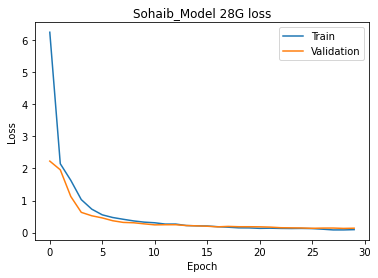

In [8]:
# Plot training & validation loss values
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Sohaib_Model 28G loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.draw()
plt.savefig('Smodellossv1.0.10.pdf');

Minimum validation loss 0.13 and maximum accuracy 96.33%.


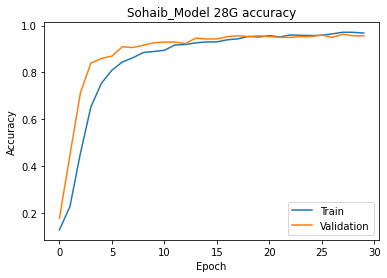

In [9]:
# Plot training & validation accuracy values
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Sohaib_Model 28G accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.draw()
plt.savefig('Smodelaccuracyv1.0.10.pdf')


    
print("Minimum validation loss {:.2f} and maximum accuracy {:.2f}%.".format(np.min(History.history['val_loss'])
                                                                   , 100*np.max(History.history['val_accuracy'])))

## Saving My model

In [10]:
if os.path.isfile('/home/zerguine/Desktop/v1.0.11/Sohaib_Modelv1.0.10.h5') is False:
        Sohaib_Model.save('/home/zerguine/Desktop/v1.0.11/Sohaib_Modelv1.0.10.h5')

## Trial with the use of external recordings

In [11]:
from tensorflow.keras.models import load_model
My_model= load_model('/home/zerguine/Desktop/v1.0.11/Sohaib_Modelv1.0.10.h5')

In [12]:
My_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0